<a href="https://colab.research.google.com/github/IngerMasha/week8_day2/blob/main/Exercises_XP_Ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/AB_NYC_2019.csv')
print("First rows DataFrame:")
print(data.head())

First rows DataFrame:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1 

In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
numerical_columns = ['price', 'number_of_reviews', 'availability_365']
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])
print("Missing values handled using KNN imputation.")
print(data[numerical_columns].isnull().sum())



Missing values handled using KNN imputation.
price                0
number_of_reviews    0
availability_365     0
dtype: int64


In [14]:
import numpy as np

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

handle_outliers(data, 'price')
handle_outliers(data, 'number_of_reviews')
print("Outliers in 'price' and 'number_of_reviews' treated.")
print(data[['price', 'number_of_reviews']].describe())
data['booking_rate'] = data['number_of_reviews'] / data['availability_365']
print("\nNew features created.")
print(data[['booking_rate']].head())


Outliers in 'price' and 'number_of_reviews' treated.
              price  number_of_reviews
count  48895.000000        48895.00000
mean     132.979753           15.67419
std       83.530504           20.34953
min        0.000000            0.00000
25%       69.000000            1.00000
50%      106.000000            5.00000
75%      175.000000           24.00000
max      334.000000           58.50000

New features created.
   booking_rate
0      0.024658
1      0.126761
2      0.000000
3      0.301546
4           inf


I don’t understand what to do next, how to calculate the price_per_person if there is no information about the number of guests.

Exercise 2: Complex Data Integration And Transformation

In [15]:
import pandas as pd
happy_data=pd.read_csv('/content/WorldHappinessReport2015.csv')
print("First rows DataFrame:")
print(happy_data.head())

First rows DataFrame:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.874

In [24]:
health_data=pd.read_csv('/content/30-70cancerChdEtc.csv')
print("First rows DataFrame:")
# print(health_data.head())
health_data.rename(columns={'Location': 'Country'}, inplace=True)
merged_data = pd.merge(happy_data, health_data, on='Country')
print(health_data.head())
print("\nFirst rows mergedDataFrame:")
print(merged_data.head())

First rows DataFrame:
       Country  Period                                          Indicator  \
0  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
1  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
2  Afghanistan    2016  Probability (%) of dying between age 30 and ex...   
3  Afghanistan    2015  Probability (%) of dying between age 30 and ex...   
4  Afghanistan    2015  Probability (%) of dying between age 30 and ex...   

         Dim1  First Tooltip  
0  Both sexes           29.8  
1        Male           31.8  
2      Female           27.7  
3  Both sexes           29.8  
4        Male           31.9  

First rows mergedDataFrame:
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1  Switzerland  Western Europe               1            7.587   
2  Switzerland  Western Europe               1            7.587   
3  Switzerland  Western Europe  

In [26]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                     'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
                     'First Tooltip']  # Adjust numerical columns as per your dataset

scaler = StandardScaler()
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])
print("Step 4: Numerical columns normalized. Data preview:")
print(merged_data[numerical_columns].head())


Step 4: Numerical columns normalized. Data preview:
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.346289  1.260476                  1.276133  1.524318   
1                  1.346289  1.260476                  1.276133  1.524318   
2                  1.346289  1.260476                  1.276133  1.524318   
3                  1.346289  1.260476                  1.276133  1.524318   
4                  1.346289  1.260476                  1.276133  1.524318   

   Trust (Government Corruption)  Generosity  Dystopia Residual  First Tooltip  
0                       2.240922    0.513314           0.792658      -1.612826  
1                       2.240922    0.513314           0.792658      -1.327913  
2                       2.240922    0.513314           0.792658      -1.897738  
3                       2.240922    0.513314           0.792658      -1.598580  
4                       2.240922    0.513314           0.792658      -1.299421  

In [27]:
from sklearn.decomposition import PCA

pca_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(merged_data[pca_columns])

merged_data['PCA_Component1'] = pca_result[:, 0]
merged_data['PCA_Component2'] = pca_result[:, 1]

print("\nPCA applied for dimensionality reduction. Data preview with PCA components:")
print(merged_data[['PCA_Component1', 'PCA_Component2']].head())


PCA applied for dimensionality reduction. Data preview with PCA components:
   PCA_Component1  PCA_Component2
0       -2.241831       -0.063127
1       -2.241831       -0.063127
2       -2.241831       -0.063127
3       -2.241831       -0.063127
4       -2.241831       -0.063127


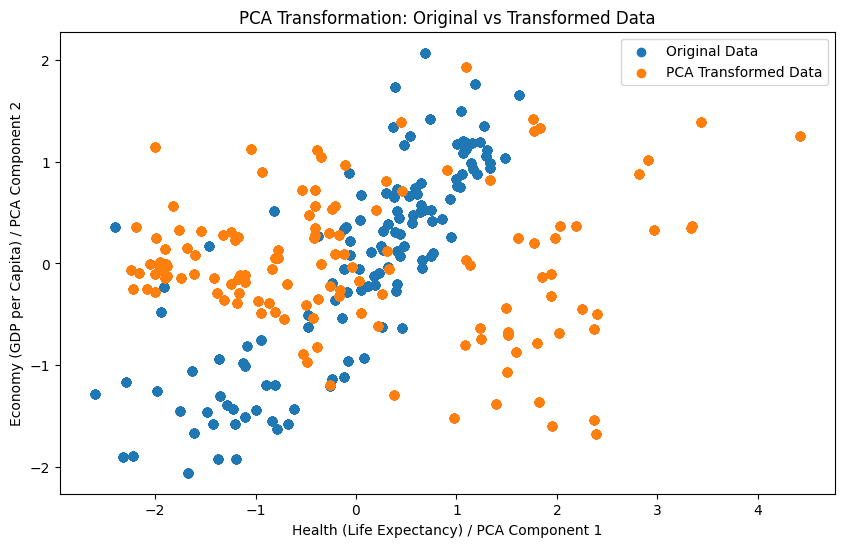

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Health (Life Expectancy)'], merged_data['Economy (GDP per Capita)'], label='Original Data')
plt.scatter(merged_data['PCA_Component1'], merged_data['PCA_Component2'], label='PCA Transformed Data')
plt.title('PCA Transformation: Original vs Transformed Data')
plt.xlabel('Health (Life Expectancy) / PCA Component 1')
plt.ylabel('Economy (GDP per Capita) / PCA Component 2')
plt.legend()
plt.show()